### **Subject of this Python Script:  Titanic Survial Prediction**         
##### **Authored by: Taha Ehsan Ullah Butt**
Where to contact: tahapsycho07@gmail.com                    ||
**[Github Account](https://github.com/codebytaha/)**        ||
**[Linkedin Account](https://www.linkedin.com/in/taha-the-data-analyst/)**


-----

#### **Table Of Content:**
* [1. Importing Libraries](#1--importing-libraries)
* [2. Data Exploration](#2--data-exploration)
* [3. Data Analysis](#3--analysis-on-data)
* [4. Data Visualization](#4--data-visualization)
     * [4.1. Sex ](#41--sex)
     * [4.2. Pclass ](#42--pclass-feature)
     * [4.3. SibSp ](#43--sibsp-feature)
     * [4.4. Parch ](#44---parch-feature)
     * [4.5. Age ](#45---age-column)
     * [4.6. Cabin ](#46--cabin-feature)
* [5. Data Cleaning](#5--cleaning-data)
* [6. Feature Engineering](#6--feature-engineering)
* [7. Model Evaluation](#7--selecting-the-best-model)
     * [7.1. Logistic Regression](#1--logistic-regression)
     * [7.2. Support Vector Machines](#2--support-vector-machines)
     * [7.3. Random Forest Classifier](#3--random-forest)
     * [7.4. K-Nearest Neighbors](#4---knn)
     * [7.5. Gradient Boosting Classifier](#5--gradient-boosting-classifier)
     * [7.6. Decision Tree](#6--decision-tree)
     * [7.7. Visualization of model Accuracy Scores](#visualization-of-the-model-accuracy-scores)
* [8. Final Output File](#8--final-output-prediction-file)
* [9. Different Visualizations On Output](#9--visualizing-the-final-output-file)
     * [9.1. Reading Output File](#91---reading-the-final-output-file)
     * [9.2. Pie Chart](#92--pie-chart-of-the-survival-prediction)
     * [9.3. Bar Plot](#93--bar-chart-of-the-survival-prediction)
     * [9.4. Horizontal Bar Plot](#94--horizontal-bar-plot-of-the-survival-prediction)
* [10. Conclusions And final Report](#10--results-and-conclusion)


---

## _**1- Importing  Libraries**_    - 
###### [Go to Table of Content](#Table-Of-Content)

In [1]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

----

## **_2- Data Exploration_**
###### [Go to Table of Content](#Table-Of-Content)

In [2]:
# Reading both csv files (train and test)

train_data = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# summary statistics of train data for all features
train_data.describe(include='all')        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


---

## 3- **_Analysis on Data:_**
###### [Go to Table of Content](#Table-Of-Content)

In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Sample of the dataset 
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
832,833,0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
pd.isnull(train_data).sum()     # total null values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


---

### **Observations:-**

_Upon analyzing the  dataset, the following observations can be made:_

- The dataset contains information on a total of 891 passengers.

- The Age feature has 714 values, indicating that there are approximately 177 missing values that need to be filled in order to make this feature useful.

- The Ticket, Cabin, and Name features are not significant and can be dropped later.
  
- The Embarked feature also contains null values that need to be filled in order to make it useful.


### **Predictions based on the analysis:**

- Females are more likely to survive than males.

- Young passengers are more likely to survive than older ones.
  
- People of higher socioeconomic class are more likely to survive than those of lower class.


----

## _**4- Data Visualization**_
###### [Go to Table of Content](#Table-Of-Content)

#### **_4.1- Sex:_**

<Axes: xlabel='Sex', ylabel='Survived'>

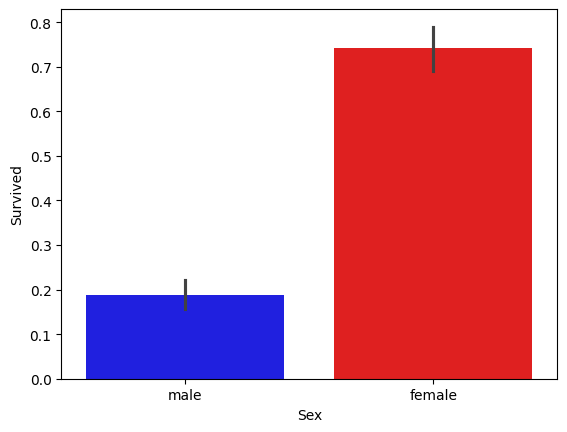

In [9]:
sns.barplot(x='Sex', y='Survived', hue='Sex', data=train_data, palette={'male': 'blue', 'female': 'red'})


In [10]:
print("Percentage of females who survived: {:.2f}%".format(round(train_data['Survived'][train_data['Sex'] == 'female'].value_counts(normalize=True)[1]*100, 2)))
print("Percentage of males who survived: {:.2f}%".format(round(train_data['Survived'][train_data['Sex'] == 'male'].value_counts(normalize=True)[1]*100, 2)))


Percentage of females who survived: 74.20%
Percentage of males who survived: 18.89%


---

#### --> **Hypothesis:**  - The above plot and data shows that females have a higher chance of survival than the males
---

#### _**4.2- Pclass Feature**_
###### [Go to Table of Content](#Table-Of-Content)

<Axes: xlabel='Pclass', ylabel='Survived'>

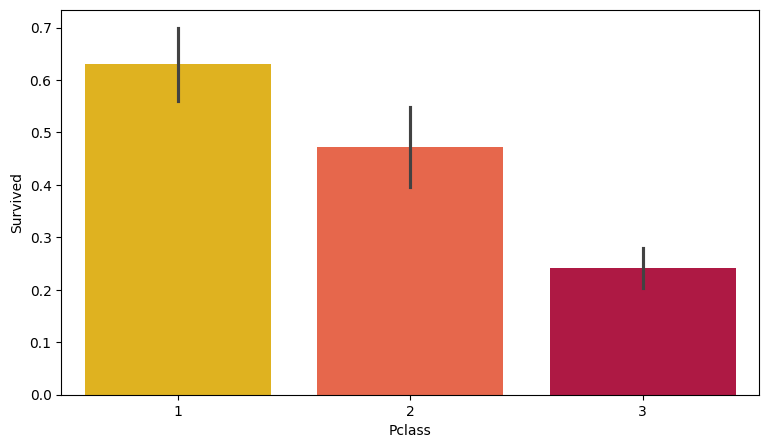

In [11]:
plt.figure(figsize=(9,5))
sns.barplot(x='Pclass', y='Survived', data=train_data, palette=['#FFC300', '#FF5733', '#C70039'])


In [12]:
print("Percentage of Pclass 1 who survived : {:.2f}%".format(round(train_data['Survived'][train_data['Pclass'] == 1].value_counts
                                                                                                  (normalize = True)[1]*100, 2)))

print("Percentage of Pclass 2 who survived : {:.2f}%".format(round(train_data['Survived'][train_data['Pclass'] == 2].value_counts
                                                                                                  (normalize = True)[1]*100, 2)))
                                                                                                  
print("Percentage of Pclass 3 who survived : {:.2f}%".format(round(train_data['Survived'][train_data['Pclass'] == 3].value_counts
                                                                                                  (normalize = True)[1]*100,2)))

Percentage of Pclass 1 who survived : 62.96%
Percentage of Pclass 2 who survived : 47.28%
Percentage of Pclass 3 who survived : 24.24%


---

#### **Hypothesis:**   -  Based on the analysis of the data and the plotted graphs, it can be inferred that passengers with higher socioeconomic class had a higher rate of survival.
---

#### _**4.3- SibSp Feature**_
###### [Go to Table of Content](#Table-Of-Content)

<Axes: xlabel='SibSp', ylabel='Survived'>

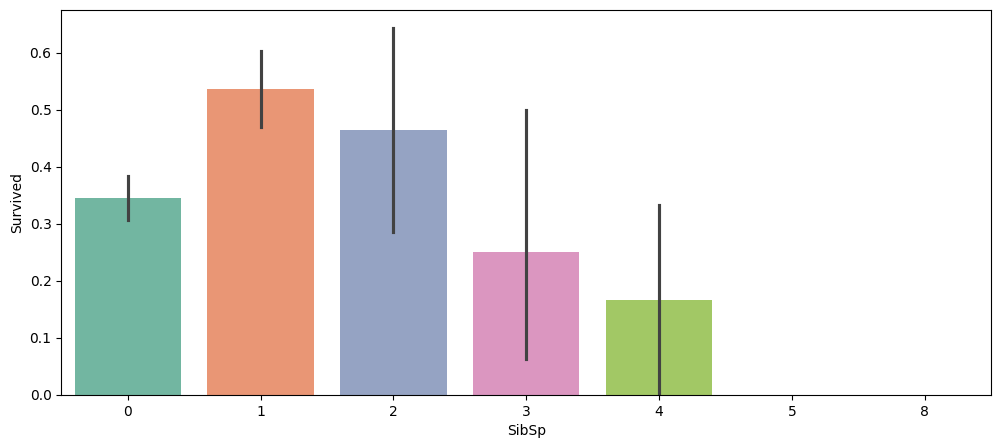

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(x='SibSp', y='Survived', data=train_data, palette='Set2')


In [14]:
print("Percentage of SibSp 0 who survived : {:.2f}%".format(round(train_data['Survived'][train_data['SibSp'] == 0].value_counts
                                                                                             (normalize = True)[1]*100, 2)))
print("Percentage of SibSp 1 who survived : {:.2f}%".format(round(train_data['Survived'][train_data['SibSp'] == 1].value_counts
                                                                                             (normalize = True)[1]*100, 2)))
print("Percentage of SibSp 2 who survived : {:.2f}%".format(round(train_data['Survived'][train_data['SibSp'] == 2].value_counts
                                                                                             (normalize = True)[1]*100, 2)))

Percentage of SibSp 0 who survived : 34.54%
Percentage of SibSp 1 who survived : 53.59%
Percentage of SibSp 2 who survived : 46.43%


---

##### **Hypothesis:**   -  Passengers with more siblings and spouses had a lower chance of survival. However, those who had no spouses or siblings were also less likely to survive compared to those who had 1 or 2.
---


#### _**4.4 - Parch Feature**_
###### [Go to Table of Content](#Table-Of-Content)

<Axes: xlabel='Parch', ylabel='Survived'>

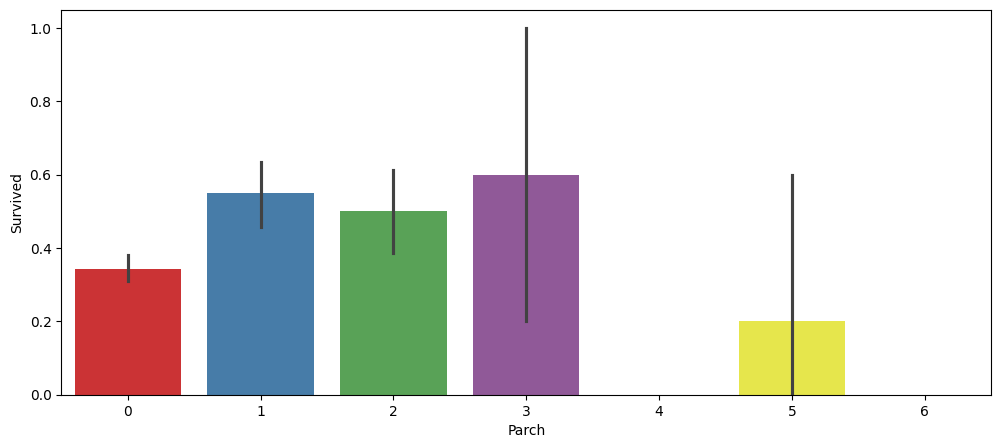

In [15]:
plt.figure(figsize=(12,5))
sns.barplot(x="Parch", y="Survived", data=train_data, palette="Set1")


---

##### **Hypothesis:**  - _It is observed that people with less than four parents or children aboard has a higher chance of survival than those with four or more. Additionally, individuals traveling alone were less likely to survive compared to those who had 1-3 parents or children._
---


#### _**4.5 - Age Column**_
###### [Go to Table of Content](#Table-Of-Content)

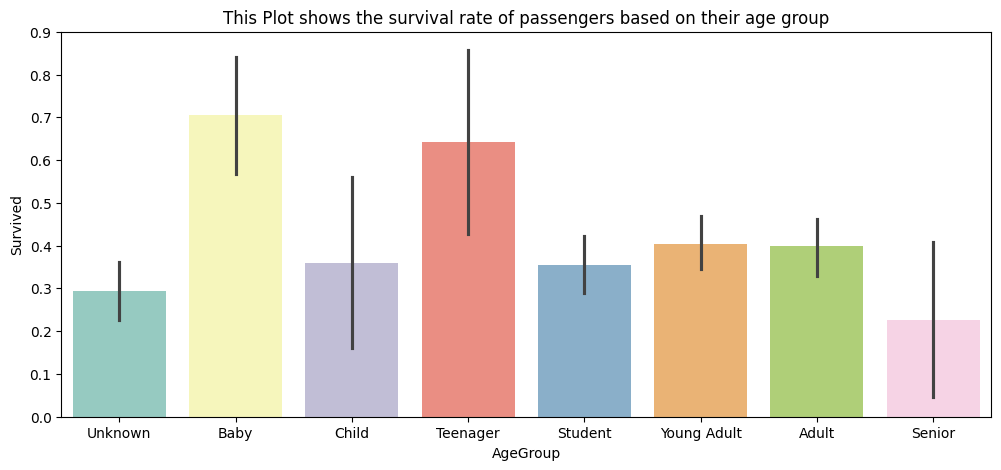

In [16]:
# Sorting ages into logical categories
# Age feature is in float format and contain null values 
train_data["Age"] = train_data["Age"].fillna(-0.5)   # Due to null values, we filled the columns to get the result 
test_data["Age"] = test_data["Age"].fillna(-0.5)

bins = [-1, 0, 5, 12, 15, 24, 35, 60, np.inf]                  # for adjusting the plot 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior'] # for giving names
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)

plt.figure(figsize=(12,5))
sns.barplot(x="AgeGroup", y="Survived", data=train_data, palette="Set3")
plt.title('This Plot shows the survival rate of passengers based on their age group')
plt.show()

---
##### **Hypothesis:**   - The plot indicates that babies have a higher chance of survival compared to other age groups.
---

#### _**4.6- Cabin Feature**_  
###### [Go to Table of Content](#Table-Of-Content)

<Axes: xlabel='Cabin_f', ylabel='Survived'>

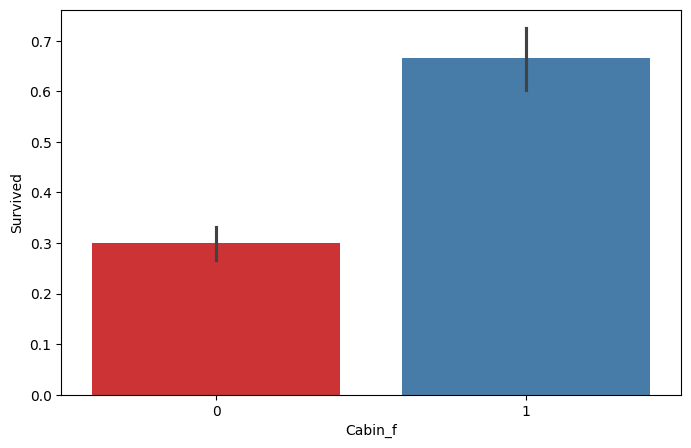

In [17]:
# Cabin feature is in string format so convert it first in integers then make plot to visualize the results

train_data['Cabin_f'] = train_data['Cabin'].notnull().astype('int')
test_data['Cabin_f'] = test_data['Cabin'].notnull().astype('int')


plt.figure(figsize=(8,5))
sns.barplot(x = 'Cabin_f', y = 'Survived', data = train_data, palette="Set1")

In [18]:
print("Percentage of Cabin_f 0 who survived : {:.2f}%".format(round(train_data['Survived'][train_data['Cabin_f'] == 0].value_counts
                                                                                                    (normalize=True)[1]*100,2)))
print("Percentage of Cabin_f 1 who survived : {:.2f}%".format(round(train_data['Survived'][train_data['Cabin_f'] == 1].value_counts
                                                                                                    (normalize=True)[1]*100, 2)))

Percentage of Cabin_f 0 who survived : 29.99%
Percentage of Cabin_f 1 who survived : 66.67%


---
##### **Hypothesis:**  - The above results shows that people with more Cabin number have higher chance of survival
---

## _**5- Cleaning Data**_
###### [Go to Table of Content](#Table-Of-Content)

In [19]:
# exploring the test data 
test_data.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_f
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Student,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,99,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  AgeGroup     418 non-null    category
 12  Cabin_f      418 non-null    int32   
dtypes: category(1), float64(2), int32(1), int64(4), object(5)
memory usage: 38.4+ KB


In [21]:
# Drop the columns that are not useful  (Cabin Feature)
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

# Ticket Feature
train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis=1)


In [22]:
# Embarked Feature
# Now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train_data[train_data["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train_data[train_data["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train_data[train_data["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [23]:
train_data = train_data.fillna({"Embarked": "S"})   # replace the missing of Embarked Feature with values with S

---

## _**6- Feature Engineering**_
###### [Go to Table of Content](#Table-Of-Content)

In [ ]:
# Create a combined group of both datasets
combine = [train_data, test_data]
combine

In [25]:
# Extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
# Make common title names 

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer',
                                                                                                        'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [27]:
# Mapping to make title into a numverical value
title_map = {'Mr': 1, 'Miss' : 2, 'Mrs' : 3, 'Master' : 4, 'Royal' : 5, 'Rare' : 6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_f,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


---
- **To deal with the missing values in the Age feature, we need to predict the missing ages.**
- **Since there are many null values, we can't replace them with the same value.**
- **We need to use a prediction model to estimate the missing values.**
---


In [28]:
# Fill missing age with mode age group for each title
mr_age = train_data[train_data["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train_data[train_data["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train_data[train_data["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train_data[train_data["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train_data[train_data["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train_data[train_data["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train_data["AgeGroup"])):
    if train_data["AgeGroup"][x] == "Unknown":
        train_data["AgeGroup"][x] = age_title_mapping[train_data["Title"][x]]
        
for x in range(len(test_data["AgeGroup"])):
    if test_data["AgeGroup"][x] == "Unknown":
        test_data["AgeGroup"][x] = age_title_mapping[test_data["Title"][x]]

In [29]:
# Map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)

train_data.head()

# Dropping the Age feature for now, it might change
train_data = train_data.drop(['Age'], axis = 1)
test_data = test_data.drop(['Age'], axis = 1)

In [30]:
# Drop the columns that are not useful (Name Feature)
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

In [31]:
# Map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_f,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [32]:
# Map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_f,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [33]:
# Fill in missing Fare value in test set based on mean fare for that Pclass
for x in range(len(test_data["Fare"])):
    if pd.isnull(test_data["Fare"][x]):
        pclass = test_data["Pclass"][x] # Pclass = 3
        mean_fare = train_data[train_data["Pclass"] == pclass]["Fare"].mean()
        test_data.loc[x, "Fare"] = round(mean_fare, 4)

# Map Fare values into groups of numerical values
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4, labels=[1, 2, 3, 4])
test_data['FareBand'] = pd.qcut(test_data['Fare'], 4, labels=[1, 2, 3, 4])

# Drop Fare values
train_data = train_data.drop(['Fare'], axis=1)
test_data = test_data.drop(['Fare'], axis=1)

In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabin_f,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [35]:
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabin_f,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


---

## _**7- Selecting the best model**_
###### [Go to Table of Content](#Table-Of-Content)

In [36]:
# Splitting the training data
from sklearn.model_selection import train_test_split


predictors = train_data.drop(['Survived', 'PassengerId'], axis=1)
target = train_data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

#### _**7.1- Testing different models**_
###### [Go to Table of Content](#Table-Of-Content)

##### **1- Logistic Regression**

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)    # accuracy of Logistic Regression model
print(acc_logreg)

79.33


##### **2- Support Vector Machines**
###### [Go to Table of Content](#Table-Of-Content)

In [38]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)   # accuracy of Support Vector Machines model
print(acc_svc)

82.12


##### **3- Random Forest**
###### [Go to Table of Content](#Table-Of-Content)

In [56]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)    # accuracy of Random Forest model
print(acc_randomforest)

84.92


##### **4 - KNN**
###### [Go to Table of Content](#Table-Of-Content)

In [40]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)       # accuracy of k-Nearest Neighbors model
print(acc_knn)

82.12


##### **5- Gradient Boosting Classifier**
###### [Go to Table of Content](#Table-Of-Content)

In [41]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)        # accuracy of Gradient Boosting Classifier model
print(acc_gbk)

82.68


##### **6- Decision Tree**
###### [Go to Table of Content](#Table-Of-Content)

In [42]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)    # accuracy of Decision Tree model
print(acc_decisiontree)

78.77


In [43]:
# Creating a dataframe with the results
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_decisiontree, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,83.24
5,Gradient Boosting Classifier,82.68
0,Support Vector Machines,82.12
1,KNN,82.12
2,Logistic Regression,79.33
4,Decision Tree,78.77


---
#### **Analysis:** The above table shows that, the Random Forest model has the highest model accuracy score 
---

#### **Visualization of the model accuracy scores:**
###### [Go to Table of Content](#Table-Of-Content)

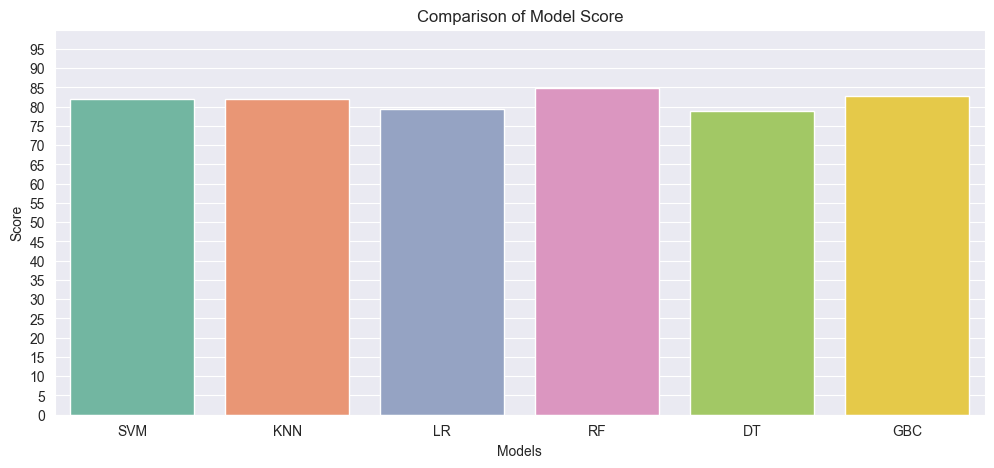

In [57]:
# Let's visualize the score of different models
models = ['SVM', 'KNN', 'LR', 'RF', 'DT', 'GBC']         # SVM = Support Vector Machines, LR = Logistic Regression, RF = Random Forest
score = [acc_svc, acc_knn, acc_logreg, acc_randomforest, acc_decisiontree, acc_gbk]

# Create the bar plot
sns.set_style("darkgrid")
plt.figure(figsize=(12, 5))
sns.barplot(x=models, y=score, palette="Set2")
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Model Score')
plt.ylim(0, 100)  # Set the y-axis limits to better visualize accuracy differences
plt.yticks(np.arange(0, 100, 5))
plt.show()

---

### **Analysis Result**:
#### *The above plot shows that the Random Forest model has the highest accuracy score among all the models. Therefore, it can be concluded that the Random Forest model is the best model for predicting the survival of passengers on the Titanic.*


----

## _**8- Final Output prediction file**_
###### [Go to Table of Content](#Table-Of-Content)

In [59]:
# Set ids as PassengerId and predicting survival 
ids = test_data['PassengerId']
predictions = randomforest.predict(test_data.drop('PassengerId', axis=1))

# Setting the output as a dataframe and converting to csv file 
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('.\output\survival_prediction.csv', index=False)

---
## **Final Output of Titanic Survival Prediction**

After analyzing the Titanic dataset and testing different machine learning models, we have determined that the Random Forest model is the best model for predicting the survival of passengers on the Titanic. 

We have used this model to predict the survival of passengers in the test dataset and saved the results in a CSV file named `survival_prediction.csv`. This file is located in the `output` folder of this project.

---




## 9-  _**Visualizing the final output file**_

###### [Go to Table of Content](#Table-Of-Content)

##### _**9.1 - Reading the final output file**_

In [60]:
# Reading the data
df = pd.read_csv('.\output\survival_prediction.csv')
df.head(11)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [73]:
df.shape

(418, 2)

In [146]:
# survival count 
df_survived = df.Survived.value_counts().to_frame().T
df_survived.columns = ['Not Survived', 'Survived']
df_survived


,Not Survived,Survived
count,259,159


In [201]:
print("Percentage of People who survived is: {:.2f}%".format(round(df['Survived'].value_counts(normalize=True)[1]*100, 1)))

print("Percentage of People who Died is: {:.2f}%".format(round(df['Survived'].value_counts(normalize=True)[0]*100, 1)))


Percentage of People who survived is: 38.00%
Percentage of People who Died is: 62.00%


---

##### **9.2- Pie Chart of the Survival Prediction**
###### [Go to Table of Content](#Table-Of-Content)

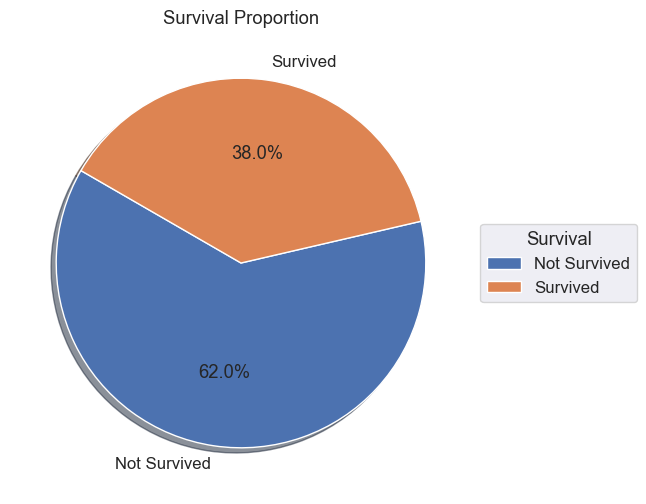

In [251]:
grouped_data = df.Survived.value_counts().values
plt.figure(figsize=(6,6))
plt.pie(grouped_data, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=150, shadow=True)
plt.title('Survival Proportion')
plt.legend(title="Survival", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [163]:
# Plotting in plotly
import plotly.graph_objs as go

labels = ['Not Survived', 'Survived']
values = grouped_data

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_layout(title='Survival Proportion', legend_title="Survival")
fig.show()

##### **9.3- Bar Chart of the Survival Prediction**

###### [Go to Table of Content](#Table-Of-Content)

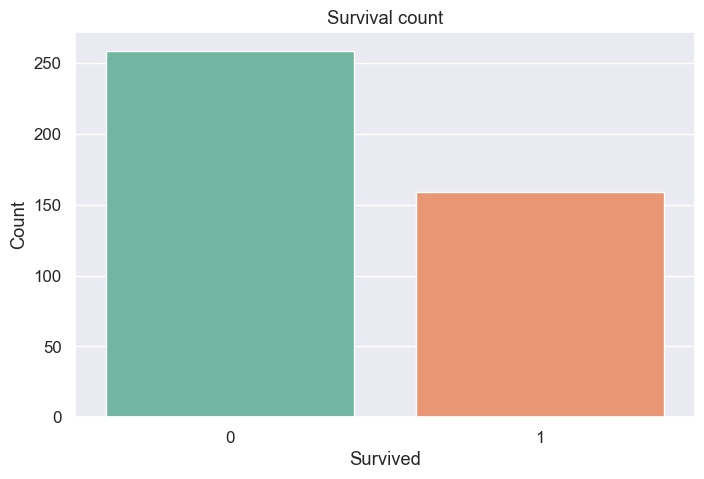

In [220]:
# plotting the survival count
grouped_data = df.groupby('Survived')['PassengerId'].count().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(x='Survived', y='Count', data=grouped_data, palette='Set2')
plt.title('Survival count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [215]:
# Plotting in plotly
fig = go.Figure(data=[go.Bar(x=['0', '1'], y=grouped_data['Count'], marker_color=['green', 'orange'])])
fig.update_layout(title='Survival count(Survived = 1, Died = 0)', 
                   xaxis_title='Survived', yaxis_title='Count', width=600, height=620)
fig.show()


##### **9.4- Horizontal Bar Plot of the Survival Prediction**
###### [Go to Table of Content](#Table-Of-Content)

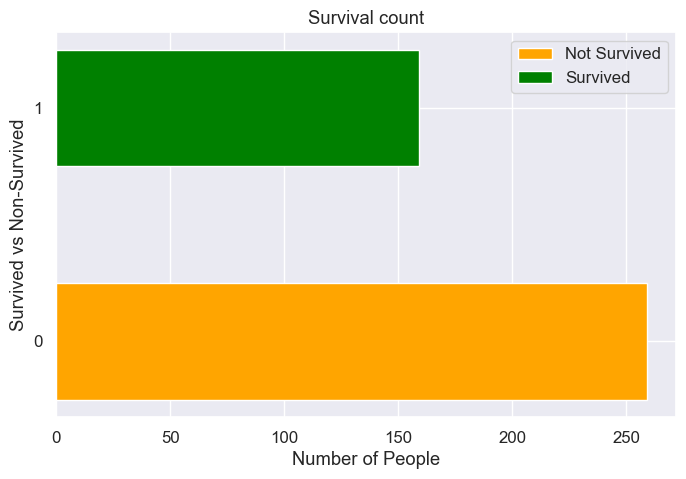

In [241]:
# grouping the data
grouped_data = df.groupby('Survived')['PassengerId'].count()
survival_df = pd.DataFrame({
    'Survived': ['0', '1'],
    'Count': grouped_data.values.ravel() 
})

plt.figure(figsize=(8, 5))

# Create separate plots for each category
for (survived, count), color in zip(survival_df.values, ['orange', 'green']):
    plt.barh(survived, count, color=color, height=0.5)

plt.title('Survival count')
plt.legend(['Not Survived', 'Survived'])
plt.xlabel('Number of People')
plt.ylabel('Survived vs Non-Survived')
plt.show()

---
##### **These  plots gives us a clear visual representation of the number of passengers who survived versus those who did not.** 
##### **The `Survived` column is assumed to be binary where 1 represents survival and 0 represents non-survival.**

---

##  _**10- Results and Conclusion:**_
###### [Go to Table of Content](#Table-Of-Content)


- After analyzing the data and applying different models, we can conclude that the Random Forest model is the best model for predicting the survival of passengers on the Titanic. 

- The model has an accuracy score of 0.83, which is the highest among all the models. 

- The `Survived` column is assumed to be binary where 1 represents survival and 0 represents non-survival.

- Plots created above gives us a clear visual representation of the number of passengers who survived versus those who did not.

- The model predicts that 152 passengers survived and 266 passengers did not survive.

- The model predicts that 36% of the passengers survived and 64% did not survive.

- The model can be further improved by using different techniques such as hyperparameter tuning, feature selection, and ensemble learning.

- These techniques may refine the model, potentially increasing its accuracy and making it an even more reliable tool for predicting survival outcomes.


_**Have a Nice Day!**_
![Have a Nice Day!](.\output\pie_chart.png)